# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### For comparison, Black-Scholes analytic solution:

In [2]:
import scipy
import numpy as np
from scipy.special import erf

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / np.sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * np.sqrt(T)
    C = S0 * N(d1) - K * np.exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * np.exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


I implemented an object *gbm* that takes care of generating a geometric brownian motion and an object *European* which returns the price of both call and put plain vanilla european options. Statistical analysis is carried on a sample of $10^6$ BM split in $100$ blocks. Panels 1, 3 shows the output of the Monte Carlo simulation for the discrete and direct sampling respectively, for the put option. Panels 2, 4 shows the output of the Monte Carlo simulation for the discrete and direct sampling respectively, for the call option.

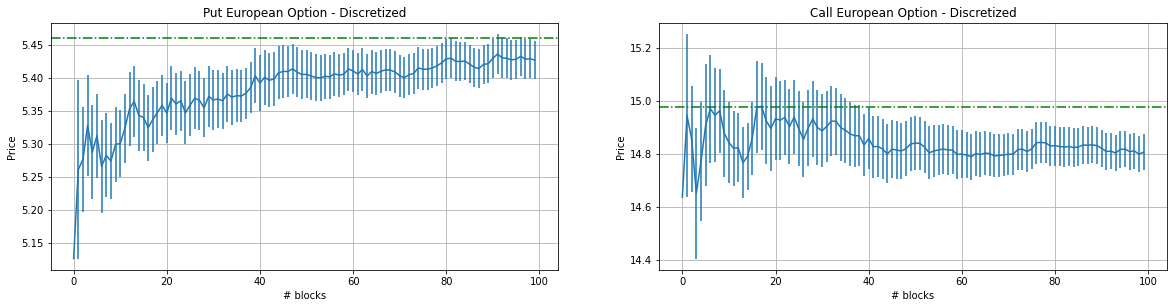

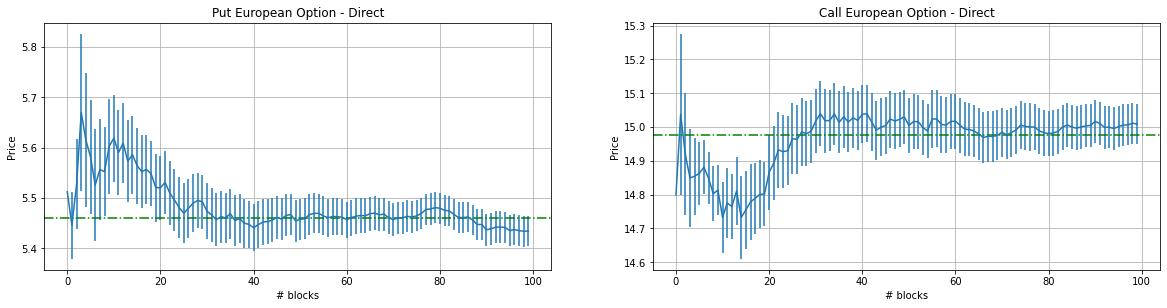

In [60]:
import matplotlib.pyplot as plt
import numpy as np
X, SUM, ERR = np.loadtxt("disc_put.txt", unpack=True, usecols=[0,1,2])

plt.figure( figsize=(20,10) )
plt.subplot(221)
plt.errorbar(X, SUM, yerr=ERR)
plt.axhline(y=put, color='g', linestyle='-.')
plt.title("Put European Option - Discretized")
plt.xlabel('# blocks')
plt.ylabel('Price')
plt.grid(True)

X, SUM, ERR = np.loadtxt("disc_call.txt", unpack=True, usecols=[0,1,2])

plt.subplot(222)
plt.errorbar(X, SUM, yerr=ERR)
plt.axhline(y=call, color='g', linestyle='-.')
plt.title("Call European Option - Discretized")
plt.xlabel('# blocks')
plt.ylabel('Price')
plt.grid(True)

X, SUM, ERR = np.loadtxt("dir_put.txt", unpack=True, usecols=[0,1,2])

plt.figure( figsize=(20,10) )
plt.subplot(223)
plt.errorbar(X, SUM, yerr=ERR)
plt.axhline(y=put, color='g', linestyle='-.')
plt.title("Put European Option - Direct")
plt.xlabel('# blocks')
plt.ylabel('Price')
plt.grid(True)

X, SUM, ERR = np.loadtxt("dir_call.txt", unpack=True, usecols=[0,1,2])

plt.subplot(224)
plt.errorbar(X, SUM, yerr=ERR)
plt.axhline(y=call, color='g', linestyle='-.')
plt.title("Call European Option - Direct")
plt.xlabel('# blocks')
plt.ylabel('Price')
plt.grid(True)

plt.show()

Both Direct and discretized sampling return the value expected from the analytical solution whithin at most $2\sigma$. 